# Time of day modifiers using LOWESS

The `utils` directory inside the `models` directory is new with this PR. Make sure to import it to have access to the LOWESS regression methods.

We currently don't have a good way of importing stuff from other adtech directories, so we include the paths to `sys.path`:

In [1]:
import sys
sys.path.insert(0, "/Users/jdelvalle/git/adtech")
sys.path.insert(0, "/Users/jdelvalle/git/adtech/models/mediaalpha/time_of_day")

In [2]:
import os
import ds_utils
import pandas as pd
import numpy as np

from data.queries import hc_session_conversions
from models.utils.time_of_day import get_lowess_spline

In [3]:
START_DATE = '20210101'
END_DATE = '20210228'
PRODUCT = 'HEALTH'
TRAFFIC_SOURCE = 'MEDIAALPHA'

Fetch data specific to product, traffic source and needed timeframe

In [4]:
session_revenue = hc_session_conversions(START_DATE, END_DATE, PRODUCT, TRAFFIC_SOURCE)

INFO:root:query: SELECT session_id, utc_ts, utc_offset, user_ts, state, reven... executed in 3.47 seconds


Make sure to include the time of day fields necessary to get the splits and modifiers (i.e. `dayofweek`, `hourofday` and `hourfraction`)

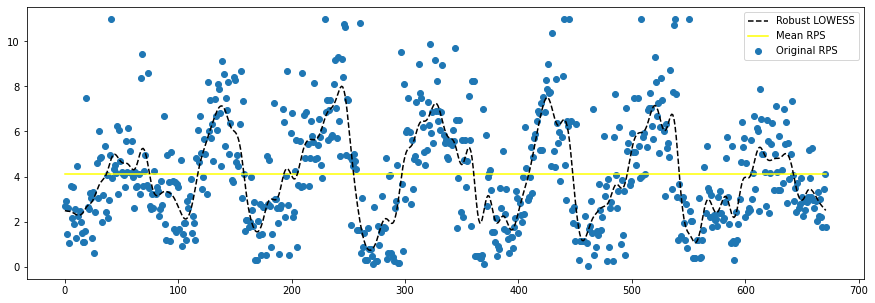

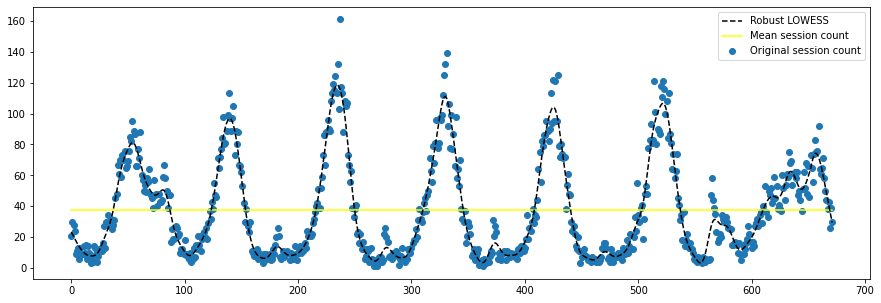

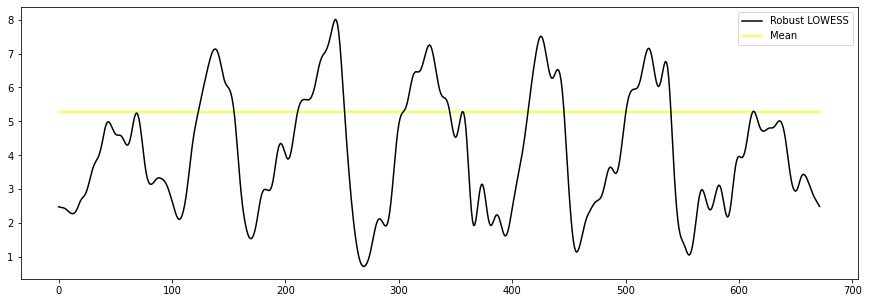

In [5]:
rev_spline, avg_rev = get_lowess_spline(session_revenue, 'user_ts', 'revenue', show_plots=True)

The above method will return the expected revenue for each hourfraction along with the revenue mean. In order to get the modifiers, you would divide the expected revenue by the returned mean:

In [6]:
rev_spline / avg_rev

array([0.47135261, 0.46942104, 0.46787417, 0.46674811, 0.46552478,
       0.46344146, 0.4599577 , 0.45505491, 0.44923268, 0.44329412,
       0.43809203, 0.43434473, 0.4325954 , 0.4333064 , 0.43694108,
       0.44398155, 0.45480392, 0.46924648, 0.48579912, 0.50119616,
       0.51244576, 0.52055336, 0.52757102, 0.53585847, 0.54771937,
       0.56446286, 0.58594541, 0.61072248, 0.63657686, 0.6612084 ,
       0.68283193, 0.70056494, 0.71462056, 0.72622215, 0.73730728,
       0.75015683, 0.76701838, 0.78952104, 0.817855  , 0.85022296,
       0.88300585, 0.91179024, 0.93290364, 0.94454039, 0.94683398,
       0.94130797, 0.93023595, 0.91613982, 0.90148501, 0.88847734,
       0.87884587, 0.87342184, 0.87172726, 0.87199143, 0.87169512,
       0.86849677, 0.86115292, 0.84997927, 0.83682592, 0.82461611,
       0.81670225, 0.81626254, 0.82563847, 0.8455809 , 0.87471497,
       0.90944221, 0.94442563, 0.97366321, 0.9918978 , 0.99585072,
       0.98451202, 0.95854285, 0.9197623 , 0.87109375, 0.81664

### Important notes:

* 15 min intervals are used by default
* Days are encoded from `0` to `6`, with Sunday being `0`
* 1 month's worth of data points is usually not enough. Some automation for finding the right timeframe is needed
* Returned array is of shape `(672,)`, which is just `96*7`